# <font color="purple">SNR Result</font>

In [ ]:
!pip install -qq -e git+http://github.com/tensorflow/cleverhans.git#egg=cleverhans
import sys
sys.path.append('/content/src/cleverhans')
import cleverhans

     |████████████████████████████████| 163kB 9.0MB/s 
     |████████████████████████████████| 51kB 8.2MB/s 


In [ ]:
import tensorflow as tf
from cleverhans.future.tf2.attacks import fast_gradient_method
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import Callback, LearningRateScheduler, EarlyStopping
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import  KFold
import gzip
import pickle
import numpy as np

import warnings
warnings.filterwarnings("ignore")

print("\nTensorflow Version: " + tf.__version__)


# defined utility functions
from preprocessing import preprocessing_data

from _utility import lrate, get_adversarial_examples, print_test


Tensorflow Version: 2.3.0


In [ ]:
epsilon_list = [i/1000 for i in range(0,33)]

In [ ]:
def read_data():
    with open("data.pz", 'rb') as file_:
        with gzip.GzipFile(fileobj=file_) as gzf:
            data = pickle.load(gzf, encoding='latin1', fix_imports=True)
    return data
data = read_data()

In [ ]:
X, y = preprocessing_data(data)
X_train, X_test, Y_train, y_test = train_test_split(X, y, test_size = 0.1)
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size = 0.1)

In [ ]:
model_Adv_Resnet = tf.keras.models.load_model("ResNet_Adv.h5")
column_2 = []
evaluation_accuracy_2 = []

for eps in epsilon_list:
  if eps !=0:
    x_adv  =  get_adversarial_examples(model_Adv_Resnet, X_test, y_test, eps)
    test = model_Adv_Resnet.evaluate(x_adv, y_test)
    SNR = 20*np.log10(np.linalg.norm(X_test)/np.linalg.norm(X_test-x_adv))
    column_2.append(SNR)
    evaluation_accuracy_2.append(test[1])


18/18 [==============================] - 0s 3ms/step - loss: 1.6616 - acc: 0.4956


In [ ]:
column = []
evaluation_accuracy = []
model_Resnet = tf.keras.models.load_model("ResNet_non_Adv.h5")

for eps in epsilon_list:
  if eps !=0:
    x_adv  =  get_adversarial_examples(model_Resnet,X_test, y_test, eps)
    test = model_Resnet.evaluate(x_adv, y_test)
    SNR = 20*np.log10(np.linalg.norm(X_test)/np.linalg.norm(X_test-x_adv))
    column.append(SNR)
    evaluation_accuracy.append(test[1])


18/18 [==============================] - 0s 3ms/step - loss: 2.6628 - acc: 0.3630


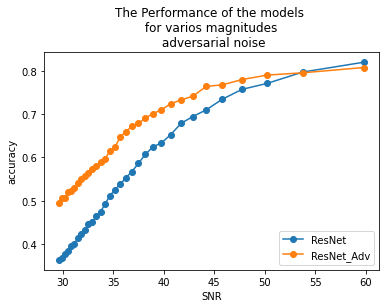

In [ ]:
import matplotlib.pyplot as plt

legend = ["ResNet", "ResNet_Adv"]
#plt.plot(column, resnet, 'o-')
plt.plot(column, evaluation_accuracy, 'o-')
#plt.plot(column, parseval, 'o-')
plt.plot(column_2, evaluation_accuracy_2, 'o-')
plt.title("The Performance of the models \n for varios magnitudes \n adversarial noise")
plt.ylabel('accuracy')
plt.xlabel('SNR')
plt.legend(legend, loc='lower right')
plt.show()